# Business Problem & Aim

The gaming company aims to segmentated its customers by using some features of them and be able to predict which segment of customers may pay what amount of money for its products.


In [2]:
#Importing the modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the data
persona = pd.read_csv("persona.csv")

In [4]:
#Cheching the data with Check Function
def check(df, head = 5):
    print("**********************************HEAD**********************************")
    print(df.head(head))
    print("**********************************TAIL**********************************")
    print(df.tail(head))
    print("**********************************TYPES**********************************")
    print(df.dtypes)
    print("**********************************SHAPE**********************************")
    print(df.shape)
    print("**********************************NA**********************************")
    print(df.isnull().sum())
    print("**********************************QUANTILES**********************************")
    print(df.describe([0, 0.05, 0.5, 0.95]))

check(persona)

**********************************HEAD**********************************
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17
**********************************TAIL**********************************
      PRICE   SOURCE     SEX COUNTRY  AGE
4995     29  android  female     bra   31
4996     29  android  female     bra   31
4997     29  android  female     bra   31
4998     39  android  female     bra   31
4999     29  android  female     bra   31
**********************************TYPES**********************************
PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object
**********************************SHAPE**********************************
(5000, 5)
**********************************NA**********************************
PRICE      0
SOURCE     0
SEX        0
COUNTRY 

In [20]:
#Categorical Columns
def cat_cols(df):
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in df.columns if df[col].nunique() < 5 and df[col].dtypes in ["float64", "int64"]]
    cat_but_num = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_num]
    return cat_cols
categoricals = cat_cols(persona)
categoricals

['SOURCE', 'SEX', 'COUNTRY']

In [21]:
#Summary of categorical columns
def cat_summary(df,col,plot=False):
    print(pd.DataFrame({col : df[col].value_counts(),
                        "Ratio" : df[col].value_counts(normalize=True).round(2)}))
    print("*********************************************************")
    if plot:
        sns.countplot(x = df[col], data = df)
        plt.show(block=True)
        

         SOURCE  Ratio
android    2974   0.59
ios        2026   0.41
*********************************************************


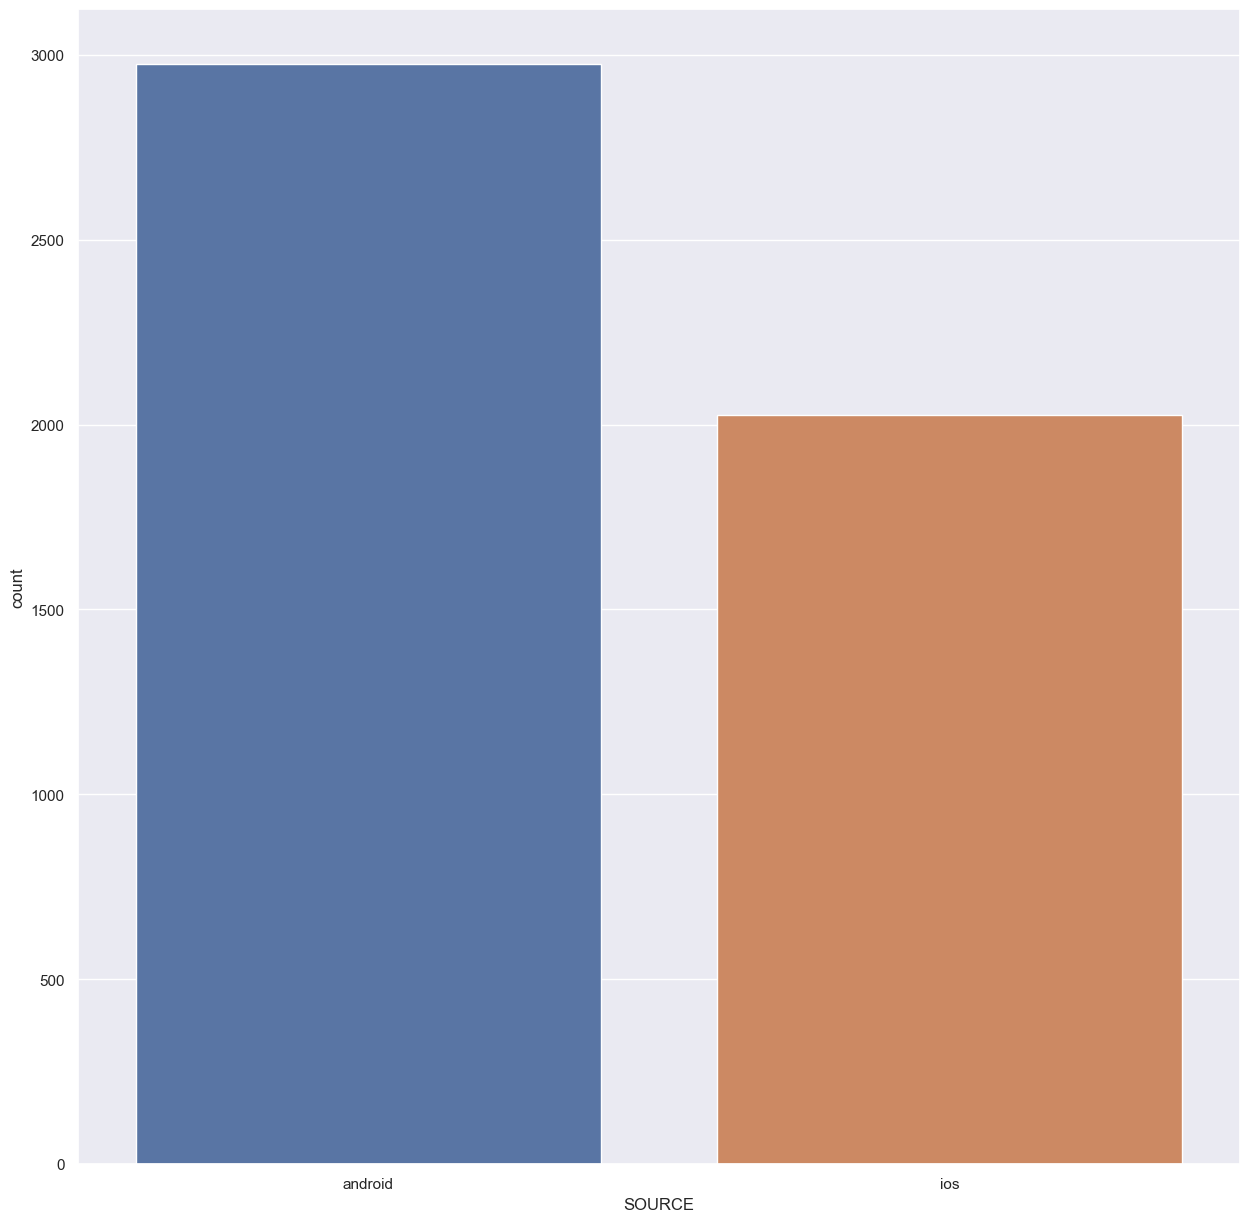

         SEX  Ratio
female  2621   0.52
male    2379   0.48
*********************************************************


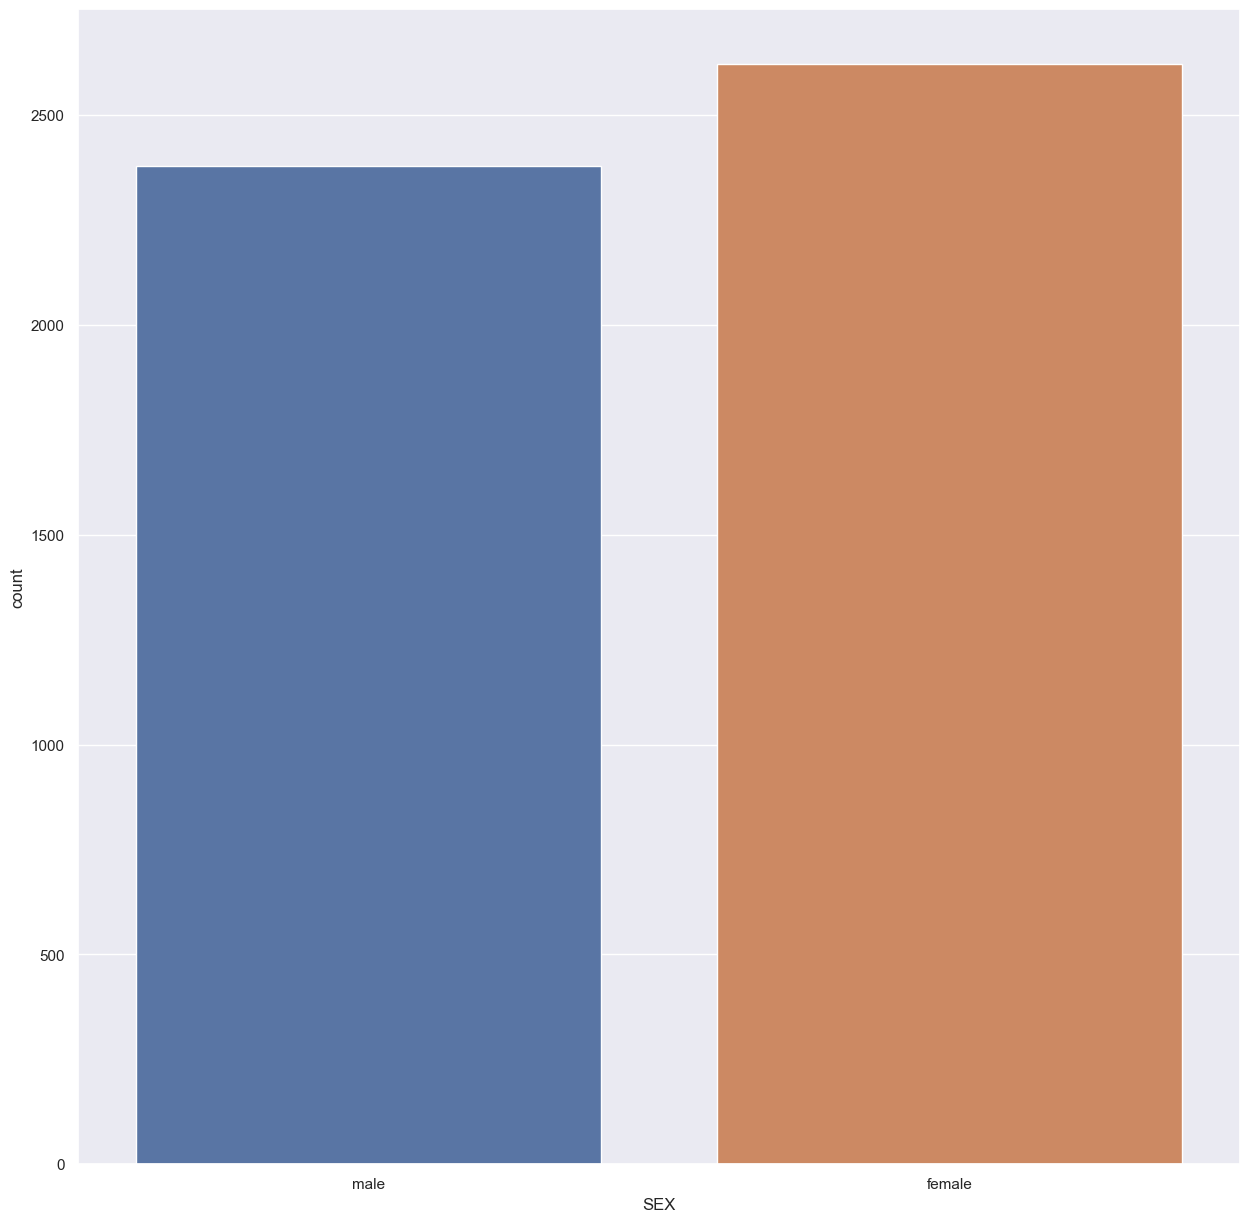

     COUNTRY  Ratio
usa     2065   0.41
bra     1496   0.30
deu      455   0.09
tur      451   0.09
fra      303   0.06
can      230   0.05
*********************************************************


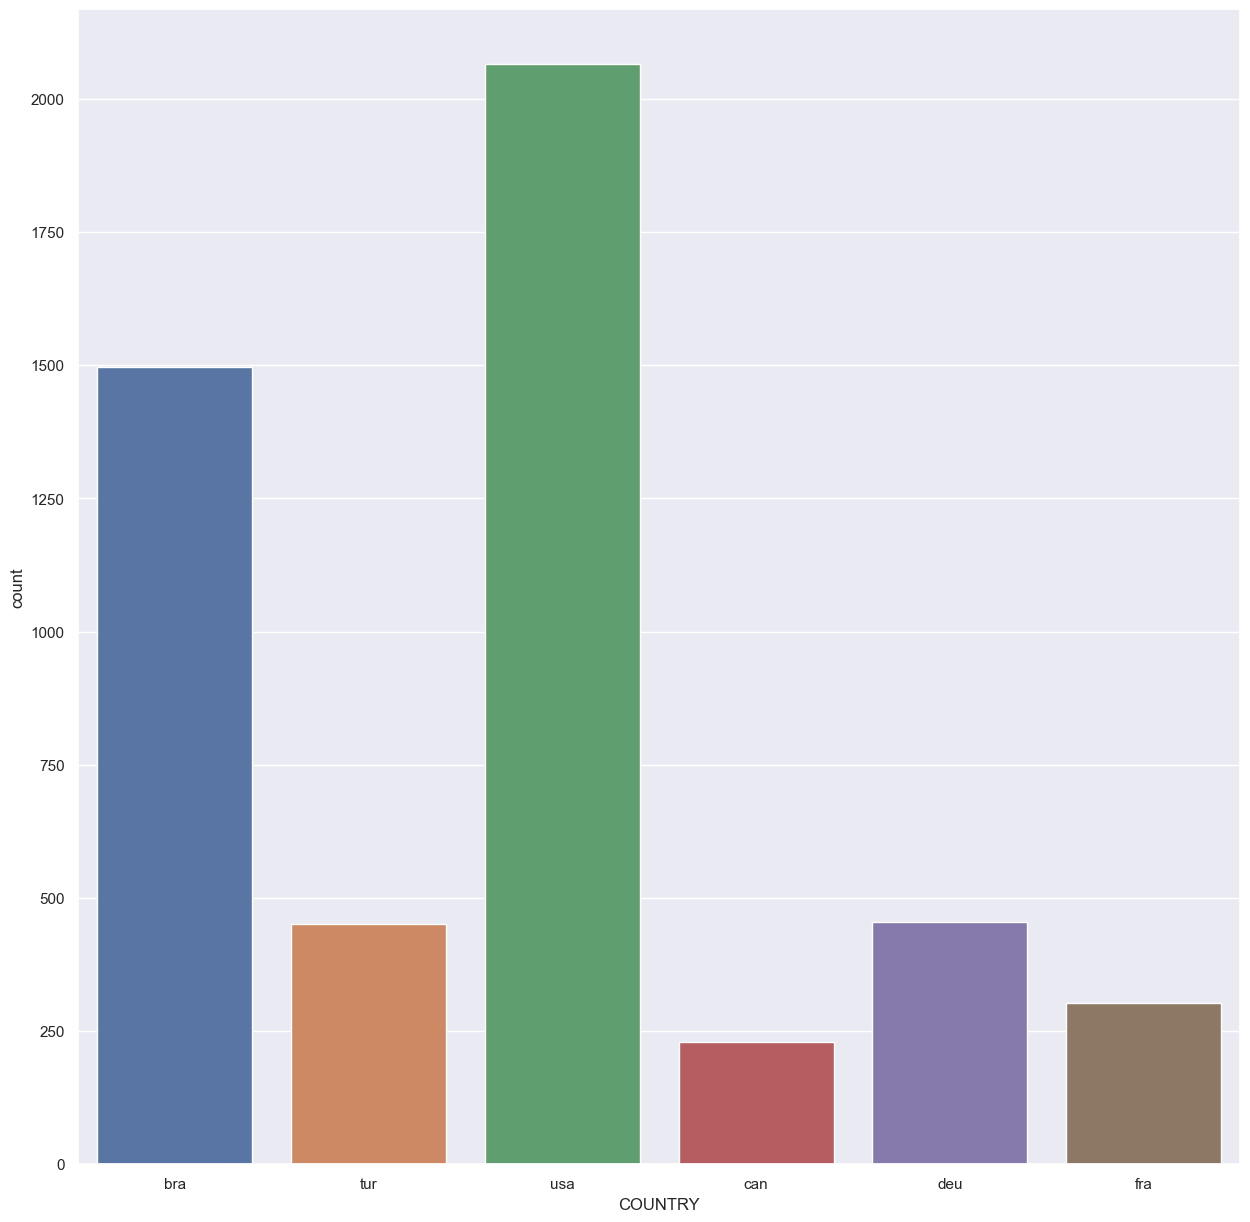

In [22]:
for col in categoricals:
    cat_summary(persona, col, True)

In [23]:
#Numerical Columns
def num_cols(df):
    num_cols = [col for col in df.columns if df[col].dtypes in ["float64", "int64"]]
    num_but_cat = [col for col in df.columns if df[col].nunique() < 5 and df[col].dtypes in ["float64", "int64"]]
    cat_but_num = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
    num_cols = num_cols + cat_but_num
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return num_cols

numericals = num_cols(persona)
numericals

['PRICE', 'AGE']

count    5000.000000
mean       34.132000
std        12.464897
min         9.000000
1%          9.000000
5%         19.000000
10%        19.000000
25%        29.000000
50%        39.000000
75%        39.000000
95%        49.000000
99%        59.000000
max        59.000000
Name: PRICE, dtype: float64
*****************************************************


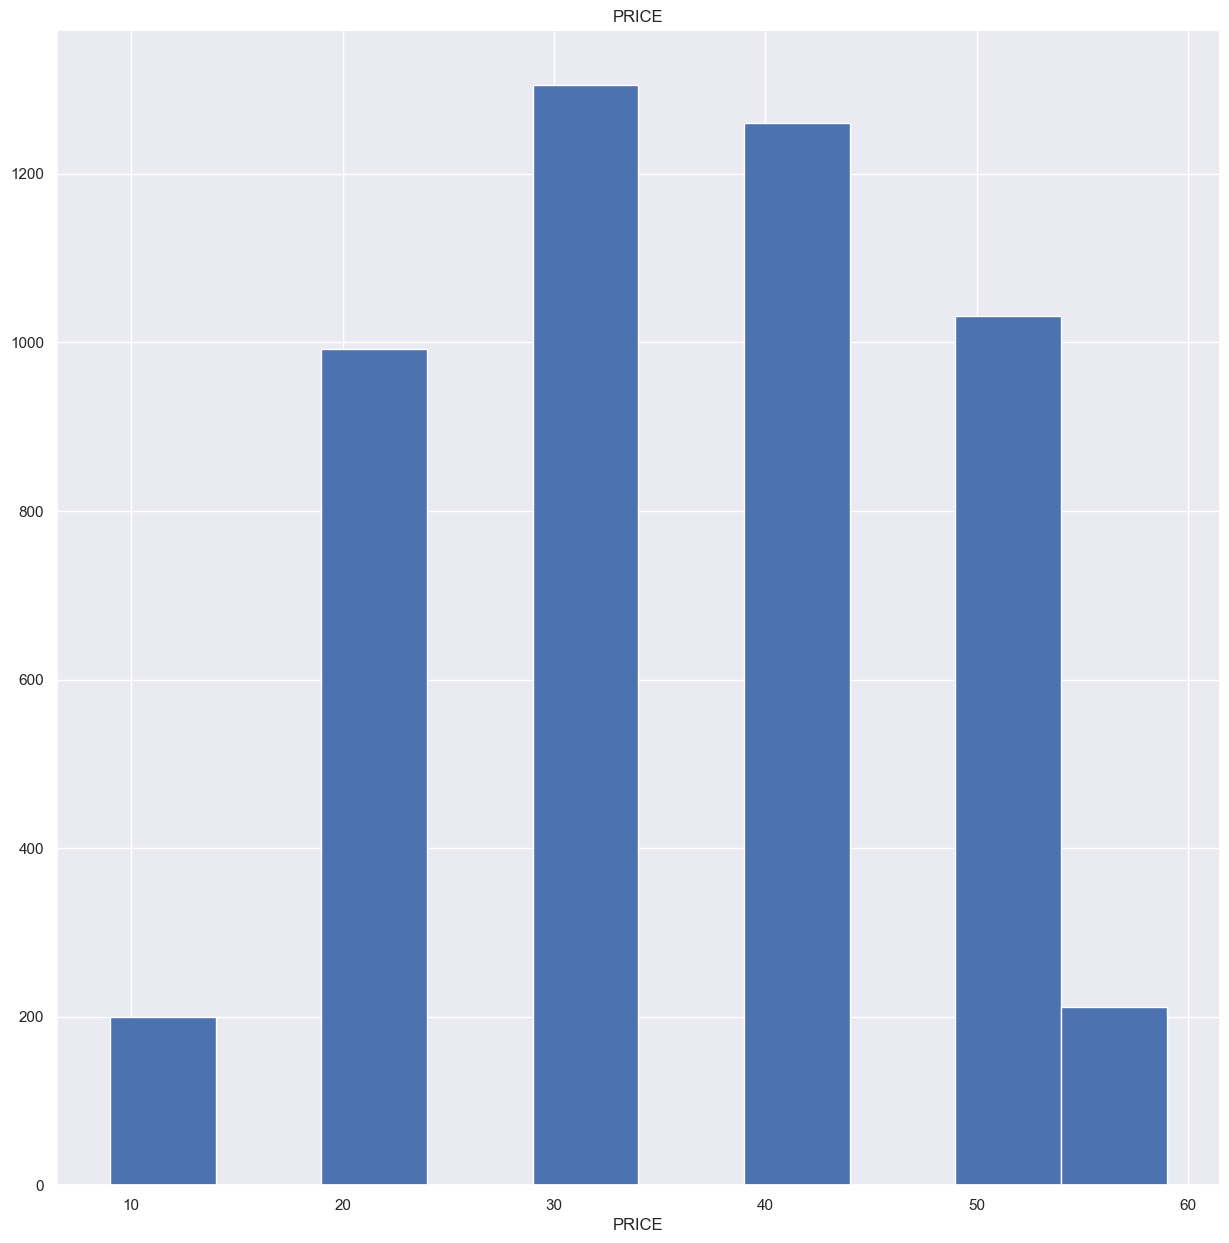

count    5000.000000
mean       23.581400
std         8.995908
min        15.000000
1%         15.000000
5%         15.000000
10%        15.000000
25%        17.000000
50%        21.000000
75%        27.000000
95%        43.000000
99%        53.000000
max        66.000000
Name: AGE, dtype: float64
*****************************************************


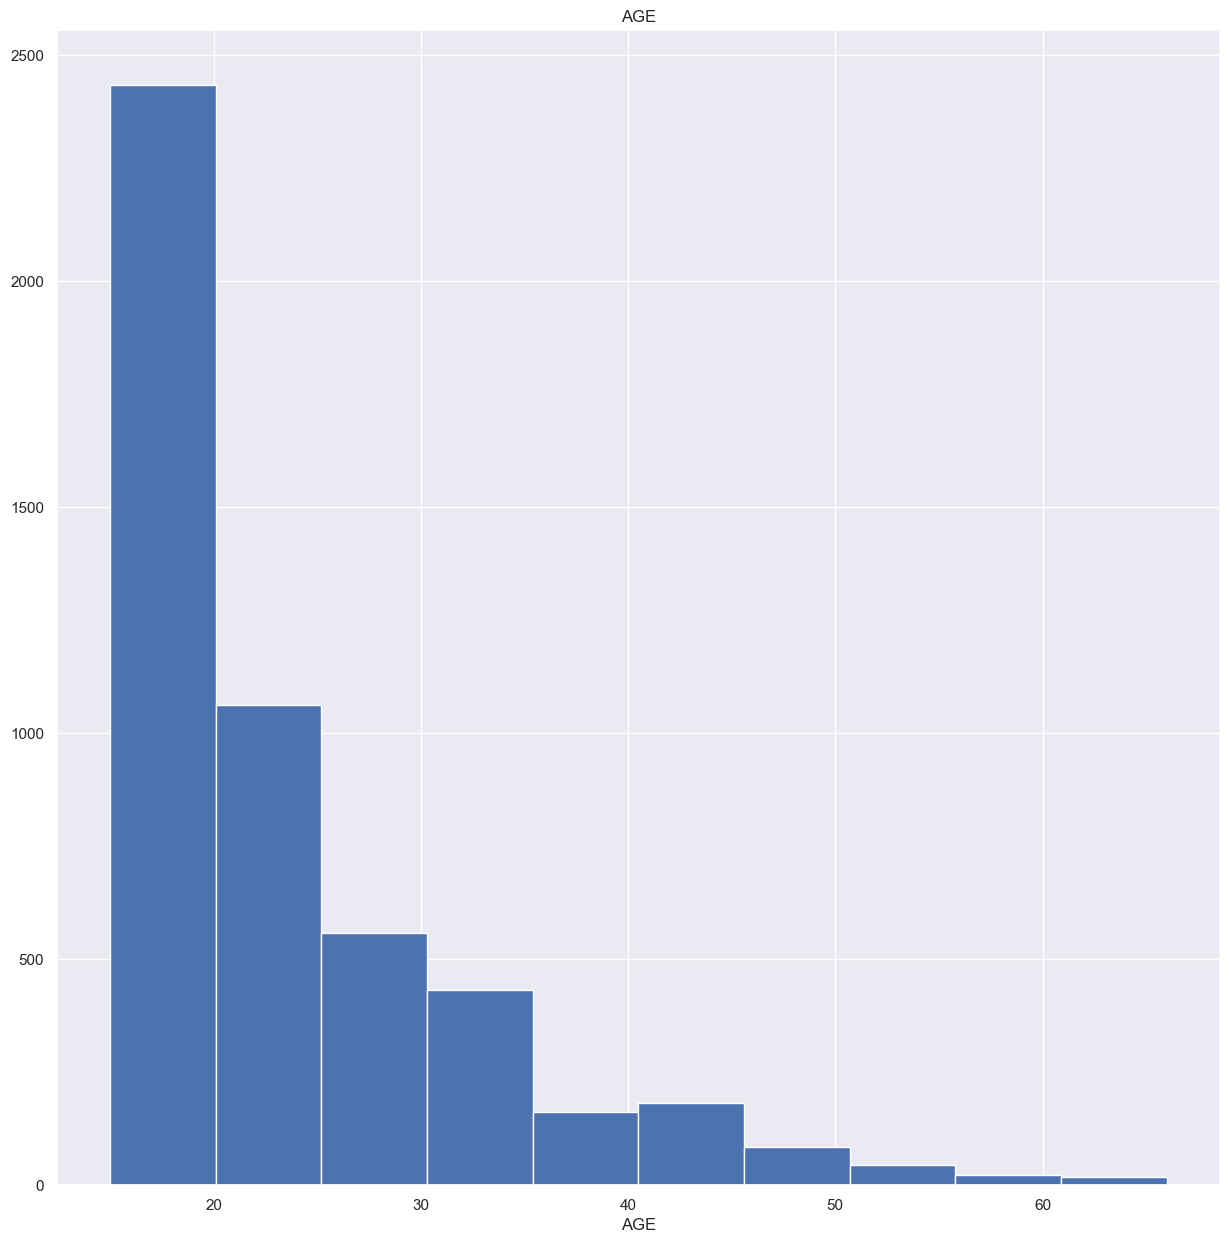

In [24]:
#Summary of numerical columns
def num_summary(df, col, plot=False):
    quantiles = [0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.95, 0.99]
    print(df[col].describe(quantiles).T)
    print("*****************************************************")
    if plot:
        df[col].hist()
        plt.xlabel(col)
        plt.title(col)
        plt.show(block=True)

for col in numericals:
    num_summary(persona, col, True)

In [26]:
#How many sales are made by each prices
persona.PRICE.value_counts()


29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

In [27]:
#How many sales are made by each countries
persona.COUNTRY.value_counts()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

In [28]:
#How much does the revenue are gained from each country
persona.groupby("COUNTRY")["PRICE"].sum()


COUNTRY
bra    51354
can     7730
deu    15485
fra    10177
tur    15689
usa    70225
Name: PRICE, dtype: int64

In [32]:
#How many sales are made by Sources
persona.SOURCE.value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

In [34]:
#Average price for countries
persona.groupby("COUNTRY")["PRICE"].mean().round(2)

COUNTRY
bra    34.33
can    33.61
deu    34.03
fra    33.59
tur    34.79
usa    34.01
Name: PRICE, dtype: float64

In [35]:
#Average price for sources
persona.groupby("SOURCE")["PRICE"].mean().round(2)

SOURCE
android    34.17
ios        34.07
Name: PRICE, dtype: float64

In [36]:
persona.groupby(["SOURCE", "COUNTRY"])["PRICE"].mean().round(2)

SOURCE   COUNTRY
android  bra        34.39
         can        33.33
         deu        33.87
         fra        34.31
         tur        36.23
         usa        33.76
ios      bra        34.22
         can        33.95
         deu        34.27
         fra        32.78
         tur        33.27
         usa        34.37
Name: PRICE, dtype: float64

In [86]:
#Group the data for segmentation
new_df = persona.groupby(["COUNTRY", "SEX", "SOURCE", "AGE",])["PRICE"].mean().round(2)
new_df

COUNTRY  SEX     SOURCE   AGE
bra      female  android  15     38.71
                          16     35.94
                          17     35.67
                          18     32.26
                          19     35.21
                                 ...  
usa      male    ios      42     30.25
                          50     39.00
                          53     34.00
                          55     29.00
                          59     46.50
Name: PRICE, Length: 348, dtype: float64

In [87]:
new_df = new_df.reset_index()
new_df

,COUNTRY,SEX,SOURCE,AGE,PRICE
0,bra,female,android,15,38.71
1,bra,female,android,16,35.94
2,bra,female,android,17,35.67
3,bra,female,android,18,32.26
4,bra,female,android,19,35.21
...,...,...,...,...,...
343,usa,male,ios,42,30.25
344,usa,male,ios,50,39.00
345,usa,male,ios,53,34.00
346,usa,male,ios,55,29.00


In [88]:
#Determining the age ranges
bins = [0,18,23,30,40, new_df.AGE.max()]
bins

[0, 18, 23, 30, 40, 66]

In [89]:
#Determining the labels
labels = ["0-18", "19-23", "24-30", "31-40", "41-" + str(new_df["AGE"].max())]
labels

['0-18', '19-23', '24-30', '31-40', '41-66']

In [90]:
#Adding a age_rance columns
new_df["AGE_RANGE"] = pd.cut(new_df.AGE, bins, labels = labels)
new_df.head()

,COUNTRY,SEX,SOURCE,AGE,PRICE,AGE_RANGE
0,bra,female,android,15,38.71,0-18
1,bra,female,android,16,35.94,0-18
2,bra,female,android,17,35.67,0-18
3,bra,female,android,18,32.26,0-18
4,bra,female,android,19,35.21,19-23


In [91]:
#Number of customers for age ranges
new_df.AGE_RANGE.value_counts()

24-30    78
0-18     77
19-23    71
31-40    65
41-66    57
Name: AGE_RANGE, dtype: int64

In [94]:
#Adding the rules to the dataframe
new_df["RULES"] = [row[0] + "_" + row[1] + "_" + row[2] + "_" + row[5] for row in new_df.values]

In [95]:
new_df

,COUNTRY,SEX,SOURCE,AGE,PRICE,AGE_RANGE,RULES
0,bra,female,android,15,38.71,0-18,bra_female_android_0-18
1,bra,female,android,16,35.94,0-18,bra_female_android_0-18
2,bra,female,android,17,35.67,0-18,bra_female_android_0-18
3,bra,female,android,18,32.26,0-18,bra_female_android_0-18
4,bra,female,android,19,35.21,19-23,bra_female_android_19-23
...,...,...,...,...,...,...,...
343,usa,male,ios,42,30.25,41-66,usa_male_ios_41-66
344,usa,male,ios,50,39.00,41-66,usa_male_ios_41-66
345,usa,male,ios,53,34.00,41-66,usa_male_ios_41-66
346,usa,male,ios,55,29.00,41-66,usa_male_ios_41-66


In [108]:
#Creating a final df for rules and average prices
final_df = new_df.loc[:, ["RULES", "PRICE"]]
final_df

,RULES,PRICE
0,bra_female_android_0-18,38.71
1,bra_female_android_0-18,35.94
2,bra_female_android_0-18,35.67
3,bra_female_android_0-18,32.26
4,bra_female_android_19-23,35.21
...,...,...
343,usa_male_ios_41-66,30.25
344,usa_male_ios_41-66,39.00
345,usa_male_ios_41-66,34.00
346,usa_male_ios_41-66,29.00


In [109]:
final_df["SEGMENTS"] = pd.qcut(final_df.PRICE, 4, labels = ["D", "C", "B", "A"] )
final_df

,RULES,PRICE,SEGMENTS
0,bra_female_android_0-18,38.71,A
1,bra_female_android_0-18,35.94,B
2,bra_female_android_0-18,35.67,B
3,bra_female_android_0-18,32.26,C
4,bra_female_android_19-23,35.21,B
...,...,...,...
343,usa_male_ios_41-66,30.25,D
344,usa_male_ios_41-66,39.00,A
345,usa_male_ios_41-66,34.00,C
346,usa_male_ios_41-66,29.00,D


In [110]:
final_df.set_index("SEGMENTS", inplace = True)
final_df

,RULES,PRICE
SEGMENTS,,
A,bra_female_android_0-18,38.71
B,bra_female_android_0-18,35.94
B,bra_female_android_0-18,35.67
C,bra_female_android_0-18,32.26
B,bra_female_android_19-23,35.21
...,...,...
D,usa_male_ios_41-66,30.25
A,usa_male_ios_41-66,39.00
C,usa_male_ios_41-66,34.00


In [111]:
#Average prices for segments
final_df.groupby("SEGMENTS")["PRICE"].mean().round(2)

SEGMENTS
D    27.30
C    32.93
B    35.44
A    41.43
Name: PRICE, dtype: float64

In [117]:
#Implementation of the outputs
"""country = str(input("Please enter the country code, usa-bra-deu-tur-fra-can : ")).lower()
sex = str(input("Please enter your gender, male-female : ")).lower()
source = str(input("Please enter your source, android-ios : ")).lower()
age = str(input("Please enter your age range, 0-18, 19-23, 24-30, 31-40, 41-66 : ")).lower()
new_class = country + "_" + sex + "_"  + source + "_"  + age
def segmentation(df, new_class):
    return df[df["RULES"] == new_class]["PRICE"]
segmentation(final_df, new_class)"""

'country = str(input("Please enter the country code, usa-bra-deu-tur-fra-can : ")).lower()\nsex = str(input("Please enter your gender, male-female : ")).lower()\nsource = str(input("Please enter your source, android-ios : ")).lower()\nage = str(input("Please enter your age range, 0-18, 19-23, 24-30, 31-40, 41-66 : ")).lower()\nnew_class = country + "_" + sex + "_"  + source + "_"  + age\ndef segmentation(df, new_class):\n    return df[df["RULES"] == new_class]["PRICE"]\nsegmentation(final_df, new_class)'